<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Seminars/S2_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оновные алгоритмы ML

### Семинар 2: Метод kNN. Разбиение данных. Метрики качества.
#### Учимся на геномных эмбеддингах. Работа с веществами в Python. Классификация веществ и проблемы разбиения их на обучение и тест.

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Предсказание рака молочной железы

В этой задаче предлагается произвести предсказание рака молочной железы на известном <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">датасете</a> UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.

In [6]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Датасет загружен за вас, определены `X` и `y`.

In [7]:
data['data'].head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
X = data['data']
y = data['target']

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=666)

**Осуществите стандартизацию признаков в выборке**.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_temp = X_train
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''
fig, axes = plt.subplots(1,2, figsize=(15,10))

axes[0].plot(X_train_temp[:,0], X_train_temp[:,1], 'b.')
axes[1].plot(X_train[:,0], X_train[:,1], 'b.')
axes[0].set_xlim(axes[1].get_xlim())
axes[0].set_title("До стандартизации признаков", size=16)
axes[1].set_title("После стандартизации", size=16);
'''

'\nfig, axes = plt.subplots(1,2, figsize=(15,10))\n\naxes[0].plot(X_train_temp[:,0], X_train_temp[:,1], \'b.\')\naxes[1].plot(X_train[:,0], X_train[:,1], \'b.\')\naxes[0].set_xlim(axes[1].get_xlim())\naxes[0].set_title("До стандартизации признаков", size=16)\naxes[1].set_title("После стандартизации", size=16);\n'

**Импортируйте модель классификации k-NN и обучите ее (`model.fit`)**.\
*Вопрос*: на какой части выборки происходит обучение: тренировочной или тестовой?

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками бинарной классификации: precision, recall, F1-score.

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

y_test_pred = model.predict(X_test)

print("classification_report:")
print(classification_report(y_true=y_test, y_pred=y_test_pred)) #F1-score хорший

#print("classification_report:")
#print(f1_score(y_true=y_test, y_pred=y_test_pred)) 

classification_report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       146
           1       0.95      0.98      0.96       253

    accuracy                           0.95       399
   macro avg       0.95      0.94      0.95       399
weighted avg       0.95      0.95      0.95       399



Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [21]:
from sklearn.metrics import f1_score

def make_qual_chart(X_train, X_test, y_train, y_test, metric=f1_score, limit=50):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(1, limit  + 1)

    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsClassifier(n_neighbors=value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)


    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")

    plt.legend()
    plt.show()
    return param_range, train_quals, test_quals

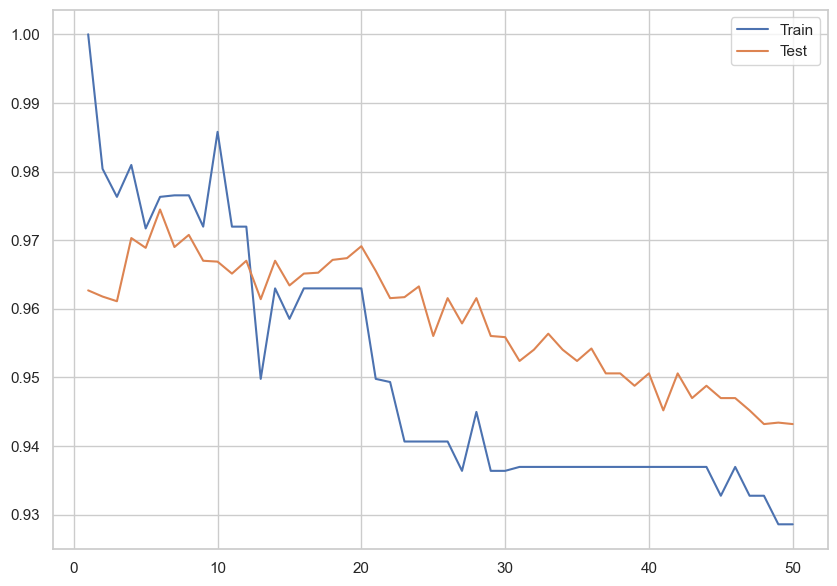

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([1.        , 0.98039216, 0.97630332, 0.98095238, 0.97169811,
        0.97630332, 0.97652582, 0.97652582, 0.97196262, 0.98578199,
        0.97196262, 0.97196262, 0.94977169, 0.96296296, 0.95852535,
        0.96296296, 0.96296296, 0.96296296, 0.96296296, 0.96296296,
        0.94977169, 0.94930876, 0.94063927, 0.94063927, 0.94063927,
        0.94063927, 0.93636364, 0.94495413, 0.93636364, 0.93636364,
        0.93693694, 0.93693694, 0.93693694, 0.93693694, 0.93693694,
        0.93693694, 0.93693694, 0.93693694, 0.93693694, 0.93693694,
        0.93693694, 0.93693694, 0.93693694, 0.93693694, 0.93273543,
        0.93693694, 0.93273543, 0.93273543, 0.92857143, 0.92857143]),
 array([0.96267191, 0.96177062, 0.96108949, 0.97029703, 0.9688716 ,
        0.97445972, 0.96

In [22]:
make_qual_chart(X_train, X_test, y_train, y_test)

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**.

In [ ]:
13-20 можно выбрать по больше k, 

### Задача 2: Обучение на геномных эмбеддингах

In [54]:
# сделать трехклассовую классификацию с помощью kNN различных однонуклеотидных замен в ДНК на нейросетевых эмбеддингах.
# был набор замен в ДНК, для них нейросеть выдала какие-то чиселки (много). Это не суть важно. Просто есть числа, содержащие информацию о замене.



В этой задаче предлагается произвести трехклассовую классификацию разных однонуклеотидных замен в ДНК, основываясь на их нейросетевых геномных эмбеддингах.

In [55]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RDTcTnhOcMX4DnJbzdPalWENNFtXi2r8' -O tfs_deepsea.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Загрузите датасет `tfs_deepsea.csv`, в качестве `y` используйте колонку `Direction`, в качестве `X` - все колонки, начиная с девятой.

In [107]:
tfs = pd.read_csv("tfs_deepsea.csv", header=0)
tfs.head(3)

,Chrom,Pos,Ref,Alt,Value,Confidence,Direction,construction,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,9,104195582,G,C,-0.009418,0.001075,0,ALDOB,0.000056,0.000949,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,9,104195582,G,T,-0.212088,0.034187,0,ALDOB,0.000051,0.000857,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,9,104195700,T,A,0.709840,0.364072,1,ALDOB,0.000089,0.001784,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


In [ ]:
# Колонка Direction - предсказываемые классы (0, 1, -1).

In [108]:
X = tfs.iloc[:,9:len(tfs)]
y = tfs['Direction']

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=666)

**Осуществите стандартизацию признаков в выборке**.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

**Импортируйте модель классификации k-NN и обучите ее (`model.fit`)**.

In [111]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [ ]:
# перед обучением не забудьте также стандартизовать значения тест

In [112]:
y_test_pred = model2.predict(X_test)

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))
#класс 1 слишком мало представлен, поэтому его выяление довольно слабо

              precision    recall  f1-score   support

          -1       0.48      0.54      0.51        57
           0       0.91      0.93      0.92       424
           1       0.33      0.11      0.16        19

    accuracy                           0.85       500
   macro avg       0.58      0.53      0.53       500
weighted avg       0.84      0.85      0.84       500



Разбейте X и y на тренировочную и тестовую выборки, **так, как указано в ячейке ниже**. Повторите все шаги, чтобы определить качество классификации.

In [121]:
X_train = X[tfs["construction"] == "ECR11"].values
X_test = X[tfs["construction"] == "ALDOB"].values
y_train = y[tfs["construction"] == "ECR11"].values
y_test = y[tfs["construction"] == "ALDOB"].values

In [122]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model2.fit(X_train, y_train)

y_test_pred = model2.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -1       0.20      0.34      0.25        94
           0       0.79      0.66      0.72       382
           1       0.33      0.21      0.26        24

    accuracy                           0.58       500
   macro avg       0.44      0.40      0.41       500
weighted avg       0.65      0.58      0.61       500



**Сделайте выводы об изменении качества**.

In [ ]:
Теперь класс 1 имеет хоть какуюто выраженость

### Задача 3: Классификация химических веществ

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7' -O bace.csv

--2021-09-29 21:27:25--  https://docs.google.com/uc?export=download&id=1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7
Resolving docs.google.com (docs.google.com)... 108.177.13.100, 108.177.13.113, 108.177.13.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uiqd2ruq60rohrbolgubauq25irqtb6p/1632950775000/10688067377005935076/*/1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7?e=download [following]
--2021-09-29 21:27:26--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uiqd2ruq60rohrbolgubauq25irqtb6p/1632950775000/10688067377005935076/*/1SYdyTbPD01GYcdz7hkyWZGoA5RV44fg7?e=download
Resolving doc-0c-50-docs.googleusercontent.com (doc-0c-50-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-0c-50-docs.googleusercontent.com (doc-0c-50-d

Датасет [BACE](http://moleculenet.ai/datasets-1) загружен за вас, определены `X`, `y` и `smiles`.

In [ ]:
bace = pd.read_csv("./bace.csv", header=0)
bace.head(3)

In [ ]:
X = bace.iloc[:,4:].values
y = bace["Class"].values
smiles = bace["mol"].values

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 3:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

**Осуществите стандартизацию признаков в выборке**.

In [ ]:
# your code here

**Импортируйте модель классификации k-NN и обучите ее (`model.fit`)**.

In [ ]:
# your code here

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [ ]:
# your code here

Функция `fingerprint_train_test_split`, приведенная ниже, осуществляет **разбиение train/test на основании молекулярных "отпечатков" (molecular fingerprints)**. Воспользуйтесь ей, чтобы получить **неслучайное разбиение на train/test** и повторите предыдущие шаги, чтобы оценить качество модели на таком случае.

In [123]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for rdkit-pypi


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [ ]:
def _split_fingerprints(fps, size1, size2):
    """This is called by fingerprint_train_test_split to divide a list of fingerprints into
    two groups.
    """
    assert len(fps) == size1 + size2

    # Begin by assigning the first molecule to the first group.

    fp_in_group = [[fps[0]], []]
    indices_in_group = ([0], [])
    remaining_fp = fps[1:]
    remaining_indices = list(range(1, len(fps)))
    max_similarity_to_group = [
        DataStructs.BulkTanimotoSimilarity(fps[0], remaining_fp),
        [0] * len(remaining_fp)
    ]
    while len(remaining_fp) > 0:
    # Decide which group to assign a molecule to.
        group = 0 if len(fp_in_group[0]) / size1 <= len(
            fp_in_group[1]) / size2 else 1

        # Identify the unassigned molecule that is least similar to everything in
        # the other group.

        i = np.argmin(max_similarity_to_group[1 - group])

        # Add it to the group.

        fp = remaining_fp[i]
        fp_in_group[group].append(fp)
        indices_in_group[group].append(remaining_indices[i])

        # Update the data on unassigned molecules.

        similarity = DataStructs.BulkTanimotoSimilarity(fp, remaining_fp)
        max_similarity_to_group[group] = np.delete(
            np.maximum(similarity, max_similarity_to_group[group]), i)
        max_similarity_to_group[1 - group] = np.delete(
            max_similarity_to_group[1 - group], i)
        del remaining_fp[i]
        del remaining_indices[i]
    return indices_in_group

In [ ]:
def fingerprint_train_test_split(X, y, smiles, test_size=0.1):
    assert X.shape[0] == y.shape[0] == smiles.shape[0]
    mols = [Chem.MolFromSmiles(s) for s in smiles]
    fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

    # Split into two groups: training set and everything else.

    test_size = int(test_size * len(y))
    train_size = len(y) - test_size
    train_inds, test_inds = _split_fingerprints(fps, train_size, test_size)

    X_train = X[train_inds,:]
    X_test = X[test_inds,:]
    y_train = y[train_inds]
    y_test = y[test_inds]

    return X_train, X_test, y_train, y_test

In [ ]:
# your code here

**Сделайте выводы**.

In [ ]:
# your answer here

---